In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [2]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
data = pd.DataFrame(data,columns= ["col1","col2"])
data

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


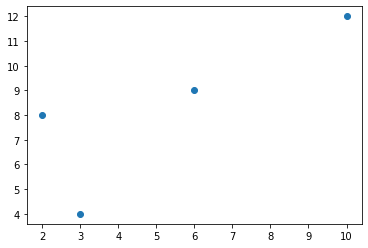

In [4]:
plt.scatter(data["col1"],data["col2"])

# Steps for PCA 
1. Standardization of the data
2. Covariance Matrix
3. Eig Value and Eig Vector
4. Find Principal Component

### 1.1  Standardization of data without using Standard Scaler

In [5]:
# get Average value of each column
mean_by_col= np.mean(data,axis=0)
mean_by_col

col1    5.25
col2    8.25
dtype: float64

In [6]:
# get standard deviation of each column
std_by_col= np.std(data,axis=0)
std_by_col

col1    3.112475
col2    2.861381
dtype: float64

In [7]:
# From each point of the dateset substract mean of each column and then divide by standard deviation
scaled_data = (data - mean_by_col)/std_by_col
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


### 1.2. Standardization of data using Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaler_data = scaler.fit_transform(data)
scaler_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [10]:
scaled_data1= pd.DataFrame(scaler_data, columns =["col1","col2"])
scaled_data1

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


### Step 2: Covariance Matrix

In [22]:
cov_matrix=  np.cov(scaled_data.T)
cov_matrix

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

### Step 3: Eigen Value and Eigen Vector

In [23]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [24]:
eig_val

array([2.40938985, 0.25727682])

In [25]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [27]:
eig_vec.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

### Performing Step2 and Step3 using  Sci-Kit Learn library

In [28]:
from sklearn.decomposition import PCA
pca= PCA()

In [30]:
pc= pca.fit_transform(scaled_data1)
pc

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [32]:
pd.DataFrame(pc, columns=["pc1","pc2"])

,pc1,pc2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [34]:
# If we do inverse transform we will get scaled data after Step1

pc_inverse= pca.inverse_transform(pc)
pc_inverse

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [35]:
# explained variance ratio
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

#### First Principal component is representing 90% of the data while second is representing 10% of the data 